![image](competi.png)

#### Aquí encontrarás todo lo que necesitas saber: https://www.kaggle.com/t/ab8726f0cfc84544abbae69a6be88071

In [1]:
import numpy as np
import pandas as pd

import urllib.request
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**Importante:**

   - Si quitas columnas o creas columnas nuevas a partir de otras, o cualquier modificación column-wise tendrás que aplicarlo al dataset de `diamond_test.csv` de cara a hacer la predicción.
   - Si por lo contrario, decides por ejemplo, quitar los outliers o hacer un `dropna()`, o cualquier modificación row-wise eso NO PODRÁS (ni debes) aplicarlo al dataset de `diamond_test.csv` de cara a hacer la predicción. ¿Por qué? Porque si el conjunto de test tiene 50 observaciones (filas) la predicción se espera que tenga 50 filas.

## Importación de clase y código de funciones de transformación de los valores de las columnas categóricas

In [2]:

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold # RepeatedStratifiedKFold sólo se utiliza para categorías 


# se generan valores numéricos con todas las columnas
# cut (distribución logaritmica 'manual') -> Ideal=100, Premium=95, Very Good= 85, Good=70 y Fair=50
def cut_to_number (cut, log_list) :
    if cut == 'Ideal':
        return log_list[0]
    elif cut == 'Premium':
        return log_list[1]
    elif cut == 'Very Good':
        return log_list[2]
    elif cut == 'Good':
        return log_list[3]
    else:
        return log_list[4]

# color (ídem) -> D=100, E=95, F=85, G=70 y H=50
def color_to_number (color, log_list) :
    if color == 'D':
        return log_list[0]
    elif color == 'E':
        return log_list[1]
    elif color == 'F':
        return log_list[2]
    elif color == 'G':
        return log_list[3]
    else:
        return log_list[4]

# clarity (ídem) -> IF=100, VVS1=98, VVS2=94, VS1=88, VS2=80, SI1=69, SI2=55 y  I1=37
def clarity_to_number (clarity, log_list) :
    if clarity == 'IF':
        return log_list[0]
    elif clarity == 'VVS1':
        return log_list[1]
    elif clarity == 'VVS2':
        return log_list[2]
    elif clarity == 'VS1':
        return log_list[3]
    elif clarity == 'VS2':
        return log_list[4]
    elif clarity == 'SI1':
        return log_list[5]
    elif clarity == 'SI2':
        return log_list[6]
    else:
        return log_list[7]




### Manipular las variables categóricas del dataset para hacerlas explotable numéricamente

In [8]:
#log_list5 = [100, 95, 85, 70, 50]
#log_list8 = [100, 98, 94, 88, 80,69, 55, 37]

log_list5 = [1, 1/2, 1/3, 1/4, 1/5]
log_list8 = [1, 1/2, 1/3, 1/4, 1/5,1/6, 1/7, 1/8]

#log_list5 = [5, 4, 3, 2, 1]
#log_list8 = [8, 7, 6, 5, 4,3, 2, 1]

#log_list5 = [100, 98, 95, 92, 88]
#log_list8 = [100, 99, 98, 97, 95,92, 89, 85]

### Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("diamonds_train.csv", index_col=0)
df['cut'] = df['cut'].apply(lambda x: cut_to_number(x, log_list5))
df['color'] = df['color'].apply(lambda x: color_to_number(x, log_list5))
df['clarity'] = df['clarity'].apply(lambda x: clarity_to_number(x, log_list8))
df = df[(df['x'] != 0) & (df['y'] != 0) & (df['z'] != 0)]
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,1.000000,0.200000,0.200000,63.0,57.0,6.73,6.70,4.23,6134
1,0.28,0.333333,1.000000,0.333333,64.0,56.0,4.14,4.17,2.66,532
2,0.42,0.500000,0.333333,0.250000,61.2,58.0,4.86,4.82,2.96,1103
3,0.26,1.000000,0.200000,1.000000,61.1,57.0,4.16,4.12,2.53,600
4,1.10,0.250000,0.250000,0.166667,63.4,57.0,6.52,6.55,4.14,4997
...,...,...,...,...,...,...,...,...,...,...
40340,1.55,0.500000,0.200000,0.200000,61.3,61.0,7.46,7.39,4.55,11708
40341,0.36,1.000000,1.000000,0.166667,60.6,56.0,4.58,4.63,2.79,619
40342,0.57,0.333333,0.200000,0.200000,62.2,55.0,5.33,5.34,3.32,1267
40343,1.01,0.333333,0.333333,1.000000,59.6,62.0,6.47,6.56,3.88,9965


# Crear las variables de uso para el entrenamiento del modelo

In [9]:
# 1. Definir X e y
X = np.array(df.drop(columns=['price'])) # se elige toda la tabla menos el precio, depth y	table
#X = np.array(df.drop(columns=['price','depth','table'])) # se elige toda la tabla menos el precio, depth y	table
#X = np.array(df[['carat','cut','color','clarity','depth','table']]) # se selecciona las columnas más importantes
y = np.array(df["price"])



In [10]:
# 2. Dividir X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle= True, test_size = 0.20, random_state = 42)
X_train

array([[0.36      , 1.        , 1.        , ..., 4.68      , 4.63      ,
        2.77      ],
       [0.74      , 0.33333333, 1.        , ..., 5.76      , 5.82      ,
        3.56      ],
       [1.03      , 0.33333333, 0.33333333, ..., 6.41      , 6.45      ,
        4.02      ],
       ...,
       [0.51      , 0.33333333, 0.25      , ..., 5.12      , 5.19      ,
        3.11      ],
       [1.04      , 1.        , 0.33333333, ..., 6.5       , 6.53      ,
        3.99      ],
       [1.37      , 0.5       , 0.2       , ..., 7.12      , 7.05      ,
        4.43      ]])

### 3. Asignar el modelo (vacío) a una variable
Aquí meteríais los parámetros. 

**Consejo**: Usa GridSearch y vuélvete loca o loco probando modelos e hiperparámetros.

In [6]:
X_train

array([[  1.09,  85.  ,  50.  , ...,   6.5 ,   6.55,   4.16],
       [  0.58,  85.  ,  50.  , ...,   5.34,   5.38,   3.31],
       [  0.32,  95.  ,  50.  , ...,   4.41,   4.38,   2.7 ],
       ...,
       [  0.83,  85.  ,  50.  , ...,   6.05,   6.07,   3.73],
       [  1.04, 100.  ,  85.  , ...,   6.5 ,   6.53,   3.99],
       [  1.09,  95.  ,  85.  , ...,   6.51,   6.56,   4.1 ]])

In [11]:
model = RandomForestRegressor(n_estimators=5000,oob_score=True,bootstrap=True,max_features=4,min_samples_split=10,min_samples_leaf=2)
model.fit(X_train,y_train)

# 5. Predecir con el modelo ya entrenado con X_test
predictions = model.predict(X_test)
print('predicciones test:\n', predictions)

# 6. Sacar métricas, valorar el modelo; en la competición se va a evaluar con la métrica de RMSE.
print('score (RMSE) de las predicciones:', np.sqrt(mean_squared_error(y_test, predictions)))

# Saving feature names for later use
feature_list = list(df.columns)
# Get numerical feature importances
importances = list(model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

predicciones test:
 [9021.32190741 4917.91809149 7791.16412471 ... 1242.68447319 3065.17149102
 1420.69594821]
score (RMSE) de las predicciones: 627.0858163780289
Variable: carat                Importance: 0.34
Variable: y                    Importance: 0.32
Variable: x                    Importance: 0.17
Variable: z                    Importance: 0.08
Variable: clarity              Importance: 0.06
Variable: color                Importance: 0.03
Variable: cut                  Importance: 0.0
Variable: depth                Importance: 0.0
Variable: table                Importance: 0.0


In [8]:
model = RandomForestRegressor(n_estimators=5000,oob_score=True,bootstrap=True,max_features=4,min_samples_split=10,min_samples_leaf=2)
model.fit(X_train,y_train)

# 5. Predecir con el modelo ya entrenado con X_test
predictions = model.predict(X_test)
print('predicciones test:\n', predictions)

# 6. Sacar métricas, valorar el modelo; en la competición se va a evaluar con la métrica de RMSE.
print('score (RMSE) de las predicciones:', np.sqrt(mean_squared_error(y_test, predictions)))

# Saving feature names for later use
feature_list = list(df.columns)
# Get numerical feature importances
importances = list(model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

predicciones test:
 [7810.31268035 3503.53736086  611.08089471 ...  496.07874154 5135.7703602
 2308.58215294]
score (RMSE) de las predicciones: 634.4242997264854
Variable: carat                Importance: 0.34
Variable: y                    Importance: 0.32
Variable: x                    Importance: 0.16
Variable: z                    Importance: 0.08
Variable: clarity              Importance: 0.06
Variable: color                Importance: 0.03
Variable: cut                  Importance: 0.0
Variable: depth                Importance: 0.0
Variable: table                Importance: 0.0


In [12]:
k_fold = RepeatedKFold(n_splits=15, n_repeats=3, random_state=1)
val_score = []
train_score = []
# define the model
n_stimators = 2000
model = RandomForestRegressor(n_estimators=n_stimators,oob_score=True,bootstrap=True,max_features=4,min_samples_split=10,min_samples_leaf=2, warm_start=True)
path = os.getcwd() + os.sep
print("path:", path)
# train son las POSICIONES de los elementos que hay que coger por iteración como parte del conjunto de entrenamiento
# val son las POSICIONES de los elementos que hay que coger por iteración como parte del conjunto de validación
for i, (train, val) in enumerate(k_fold.split(X_train)):
    print("Iteración:", i+1)
    print("train/índices batch:", train)
    print("batch_size:", len(train))
    #print("val:", val)
    print("val_size:", len(val))
    #print("batch:", X_train[train])

    # train the model
    model.fit(X_train[train], y_train[train]) # se cogen los índices que se generan en kfold_split del for y gracias a

    # Add more stimators
    model.n_estimators += 100 # para poder tener en cuenta los nuevos datos, hay que aumentar los n_estimators

    score_val = model.score(X_train[val], y_train[val])
    val_score.append(score_val)
    score_train = model.score(X_train[train], y_train[train])
    train_score.append(score_train)

path: c:\Users\barke\OneDrive\Escritorio\TheBridgeDataScientist\TareasTheBridge\week10_ML_competition_pca_kmeans\day4_competi_diamond\
Iteración: 1
train/índices batch: [    0     1     3 ... 32259 32260 32261]
batch_size: 30111
val_size: 2151
Iteración: 2
train/índices batch: [    0     1     2 ... 32259 32260 32261]
batch_size: 30111
val_size: 2151
Iteración: 3
train/índices batch: [    0     1     2 ... 32259 32260 32261]
batch_size: 30111
val_size: 2151
Iteración: 4
train/índices batch: [    1     2     3 ... 32258 32259 32260]
batch_size: 30111
val_size: 2151
Iteración: 5
train/índices batch: [    0     1     2 ... 32259 32260 32261]
batch_size: 30111
val_size: 2151
Iteración: 6
train/índices batch: [    0     1     2 ... 32259 32260 32261]
batch_size: 30111
val_size: 2151
Iteración: 7
train/índices batch: [    0     1     2 ... 32259 32260 32261]
batch_size: 30111
val_size: 2151
Iteración: 8
train/índices batch: [    0     1     2 ... 32259 32260 32261]
batch_size: 30111
val_size

[0.9730900269857023,
 0.9874884045158142,
 0.9874917877027336,
 0.9887737183761981,
 0.9880902041972005,
 0.9860529845588644,
 0.9870294045748937,
 0.9896537446921159,
 0.9881875891313624,
 0.9867237288710711,
 0.9875155758621907,
 0.9874306338683575,
 0.9893147210571234,
 0.9891644062490116,
 0.9876292955642902,
 0.9866073927856429,
 0.9874732787440152,
 0.9858641263963663,
 0.987433975364533,
 0.9873537309674846,
 0.9872380771203642,
 0.9868727302640222,
 0.9888827010605098,
 0.9874778984830765,
 0.9870728908238039,
 0.9872989895222697,
 0.9874858202032867,
 0.987486558304217,
 0.9874004368278569,
 0.9879793123400672,
 0.9863708544445231,
 0.9891461273851369,
 0.987573643547209,
 0.9862787602766904,
 0.9869905569965349,
 0.9884459728502154,
 0.9844805209840484,
 0.9863268347750601,
 0.9862123947602186,
 0.987932681964735,
 0.987274713276979,
 0.9901563272972047,
 0.9866009454814627,
 0.9881412024686246,
 0.9887940745233512]

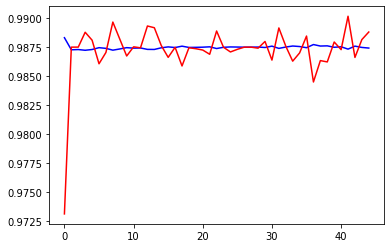

In [14]:
import matplotlib.pyplot as plt
plt.plot(train_score, color="b")
plt.plot(val_score, color="r")
val_score

In [15]:

predictions = model.predict(X_test)

# 5. Predecir con el modelo ya entrenado con X_test
#predictions = model.predict(X_test)
print('predicciones test:\n', predictions)

# 6. Sacar métricas, valorar el modelo; en la competición se va a evaluar con la métrica de RMSE.
print('score (RMSE) de las predicciones:', np.sqrt(mean_squared_error(y_test, predictions)))

predicciones test:
 [9026.32694343 4949.44017382 7767.93841331 ... 1247.0867651  3079.780213
 1419.17703449]
score (RMSE) de las predicciones: 626.7367712200277


In [16]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(n_estimators=200,random_state=42)

ada_reg.fit(X_train, y_train)

y_pred_ada_reg = ada_reg.predict(X_test)
print('score (RMSE) de las predicciones:', np.sqrt(mean_squared_error(y_test, y_pred_ada_reg)))

score (RMSE) de las predicciones: 1145.4034182869868


Siempre hay tiempo para una historia:
https://catboost.ai/docs/concepts/python-reference_catboostregressor.html

## Una vez listo el modelo, toca predecir con el dataset de predicción 

### 1. Entrena dicho modelo con TODOS tus datos de train, esto es con `diamonds_train.csv` al completo.

**CON LAS TRANSFORMACIONES QUE LE HAYAS REALIZADO A `X` INCLUÍDAS.**

Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 2. Carga los datos de `diamonds_test.csv` para predecir.

**¿De dónde saco `diamonds_test.csv`?**

In [9]:
df_test = pd.read_csv("diamonds_test.csv", index_col=0)
df_test['cut'] = df_test['cut'].apply(lambda x: cut_to_number(x, log_list5))
df_test['color'] = df_test['color'].apply(lambda x: color_to_number(x, log_list5))
df_test['clarity'] = df_test['clarity'].apply(lambda x: clarity_to_number(x,log_list8))

sample = pd.read_csv("sample_submission.csv")

df_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,100,50,55,60.0,56.0,4.41,4.43,2.65
1,0.34,100,100,100,62.1,57.0,4.52,4.46,2.79
2,1.57,85,50,80,60.3,58.0,7.58,7.55,4.56
3,0.31,100,50,80,61.8,57.0,4.32,4.36,2.68
4,1.51,70,50,98,64.0,60.0,7.26,7.21,4.63


In [10]:
#X_pred = np.array(df_test[['carat','cut','color','clarity','depth','table']]) #
#X_pred = np.array(df_test.drop(columns=['depth','table'])) # pruebas con las tabla completa
X_pred = np.array(df_test) # pruebas con las tabla completa
y_sample = sample['price']
X_pred.shape
#y_sample.shape

(13449, 9)

In [11]:
# líneas para el non-linear regression model
#X_pred = polinominal_model.transform(X_pred)
predictions_submit = model.predict(X_pred)

# líneas para todos los demás
#predictions_submit = model.predict(X_pred)
predictions_submit

array([  449.7830959 ,  1412.19624232,  9393.45863611, ...,
       14579.09974707, 10435.22684136,   702.26657602])

**¡PERO! Para subir a Kaggle la predicción, ésta tendrá que tener una forma específica y no valdrá otra.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [12]:
# control de error
np.sqrt(mean_squared_error(y_sample, predictions_submit))

9130.6603530616

### 4. Mete tus predicciones en un dataframe. 

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [13]:
submission = pd.DataFrame({"id": range(len(predictions_submit)), "price": predictions_submit})

In [35]:
submission.head()

,id,price
0,0,419.373578
1,1,2055.784778
2,2,9375.312133
3,3,543.225875
4,4,11066.685652


In [36]:
submission.shape

(13449, 2)

### 5. Pásale el CHEQUEATOR para comprobar que efectivamente está listo para subir a Kaggle.

In [14]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")
chequeator(submission)

You're ready to submit!
